In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# load the data from csv to pandas dataframe
data = pd.read_csv("parkinsons.csv")

In [3]:
#print 1st 5 rows of dataframe
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# in status column 1 represent person has parkinsons
# and 0 represent person does not have parkinsons

In [5]:
data.shape
#195 rows and 24 columns

(195, 24)

In [6]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
# check missing values in each column
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
#their is no any missing values in dataset

In [11]:
# getting some statistical measures about the data
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
# check value count of target variable i.e status
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [13]:
# 147 people has parkinsons
# 48 people does not have parkinsons (i.e healthy)

# i.e data is imbalnced we have to balance by SMOTE technique

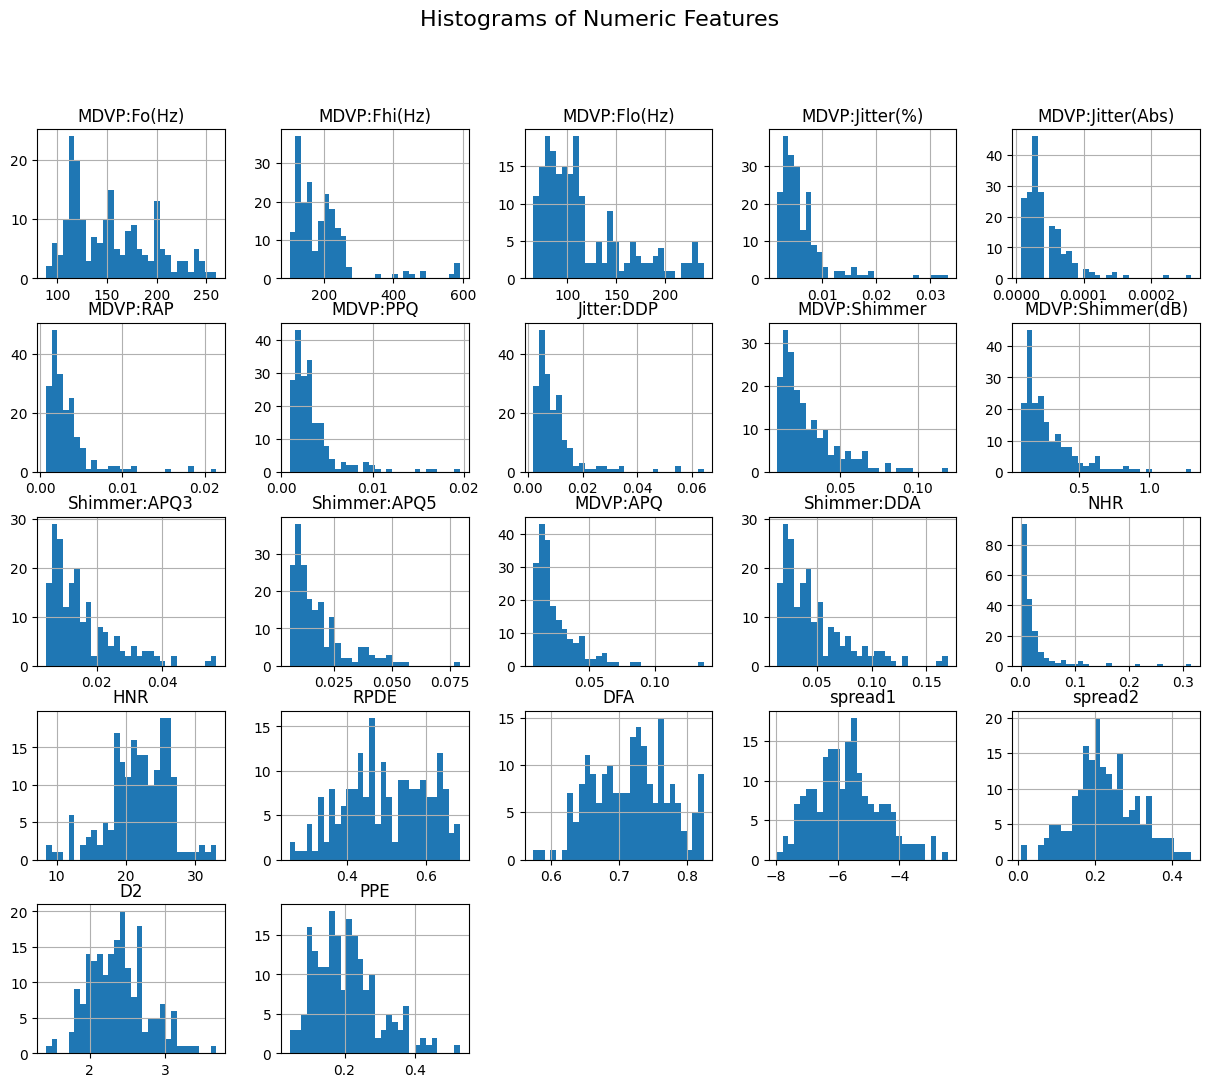

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for all numeric features
num_cols = data.drop(columns=["name", "status"]).columns
data[num_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()



Most features like Jitter, Shimmer, NHR are right-skewed (long tail).

Features like HNR, DFA are closer to normal distribution.

Indicates different scales → important for normalization/standardization before ML.

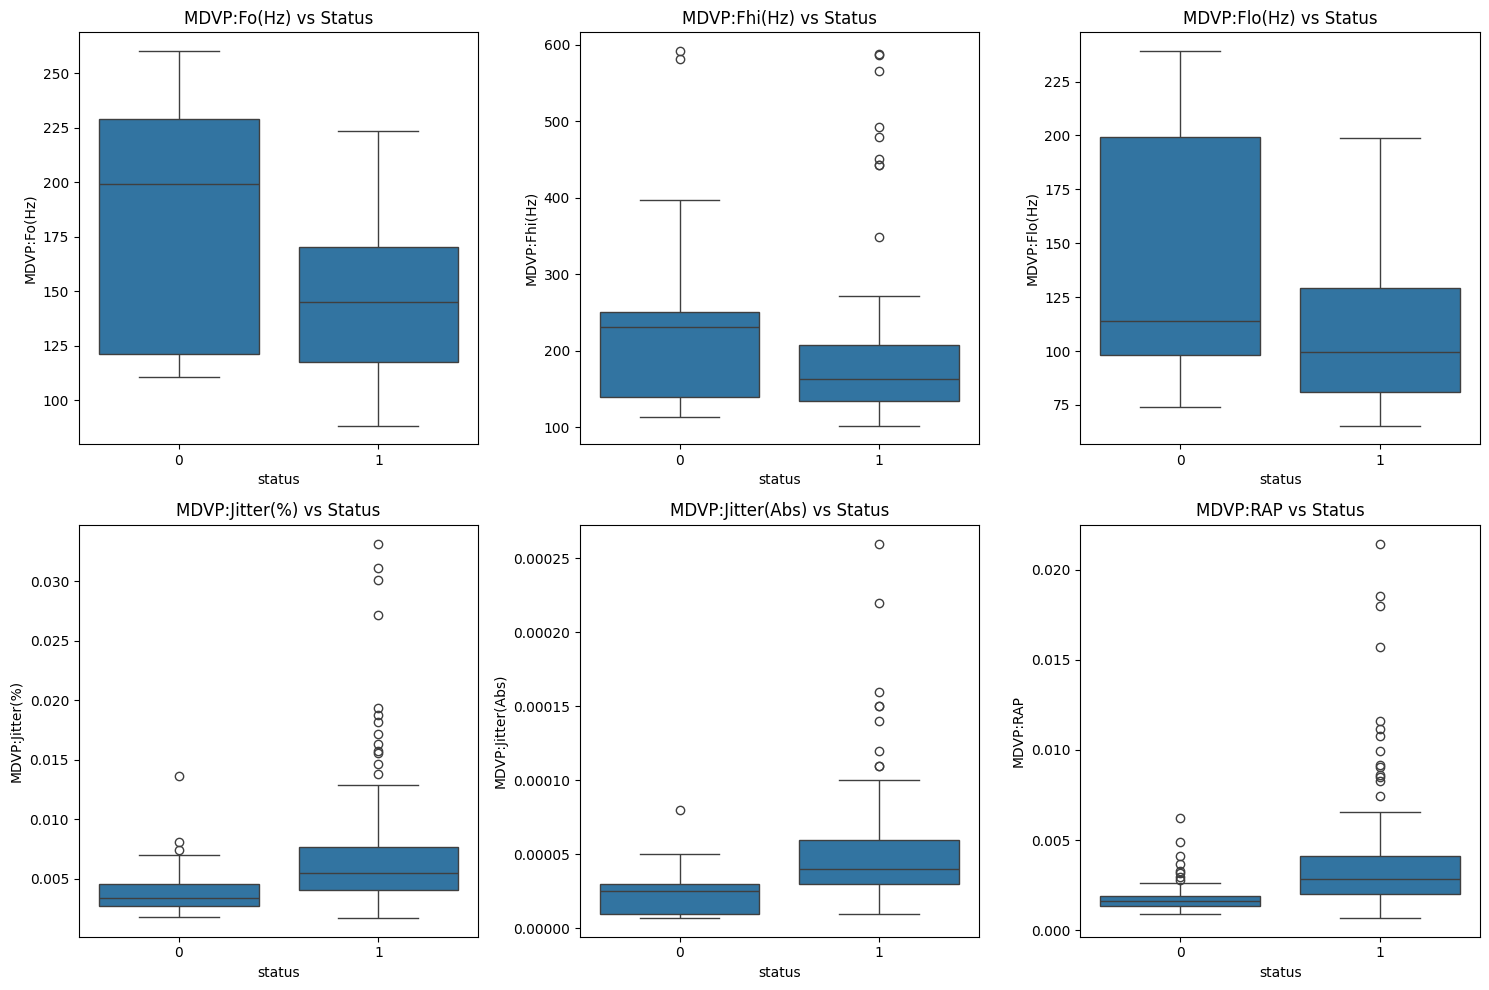

In [17]:
# 2. Boxplots for features grouped by 'status'
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6], 1):  # first 6 features as example
    plt.subplot(2, 3, i)
    sns.boxplot(x="status", y=col, data=data)
    plt.title(f"{col} vs Status")
plt.tight_layout()
plt.show()

For features like MDVP:Fo(Hz) and HNR, the median values are clearly different between healthy and Parkinson’s patients.

Parkinson’s patients often have higher jitter/shimmer values (more voice instability).

Outliers are present → might indicate variation in patient severity.

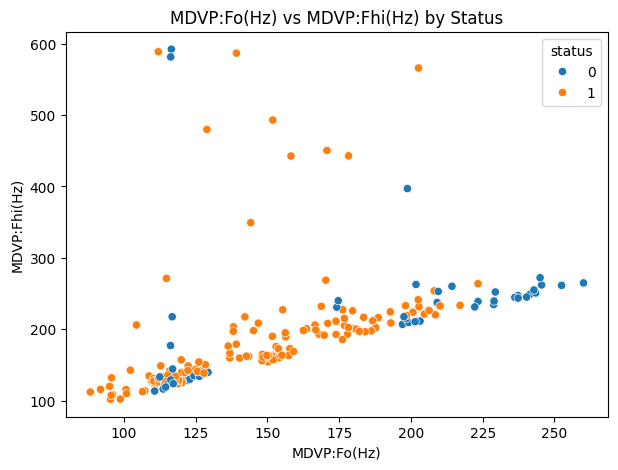

In [18]:
# 3. Scatter plots for two important features
plt.figure(figsize=(7,5))
sns.scatterplot(x="MDVP:Fo(Hz)", y="MDVP:Fhi(Hz)", hue="status", data=data)
plt.title("MDVP:Fo(Hz) vs MDVP:Fhi(Hz) by Status")
plt.show()

Clear separation:

Parkinson’s patients (status=1) cluster differently than healthy ones (status=0).

Suggests these features are discriminative for classification.

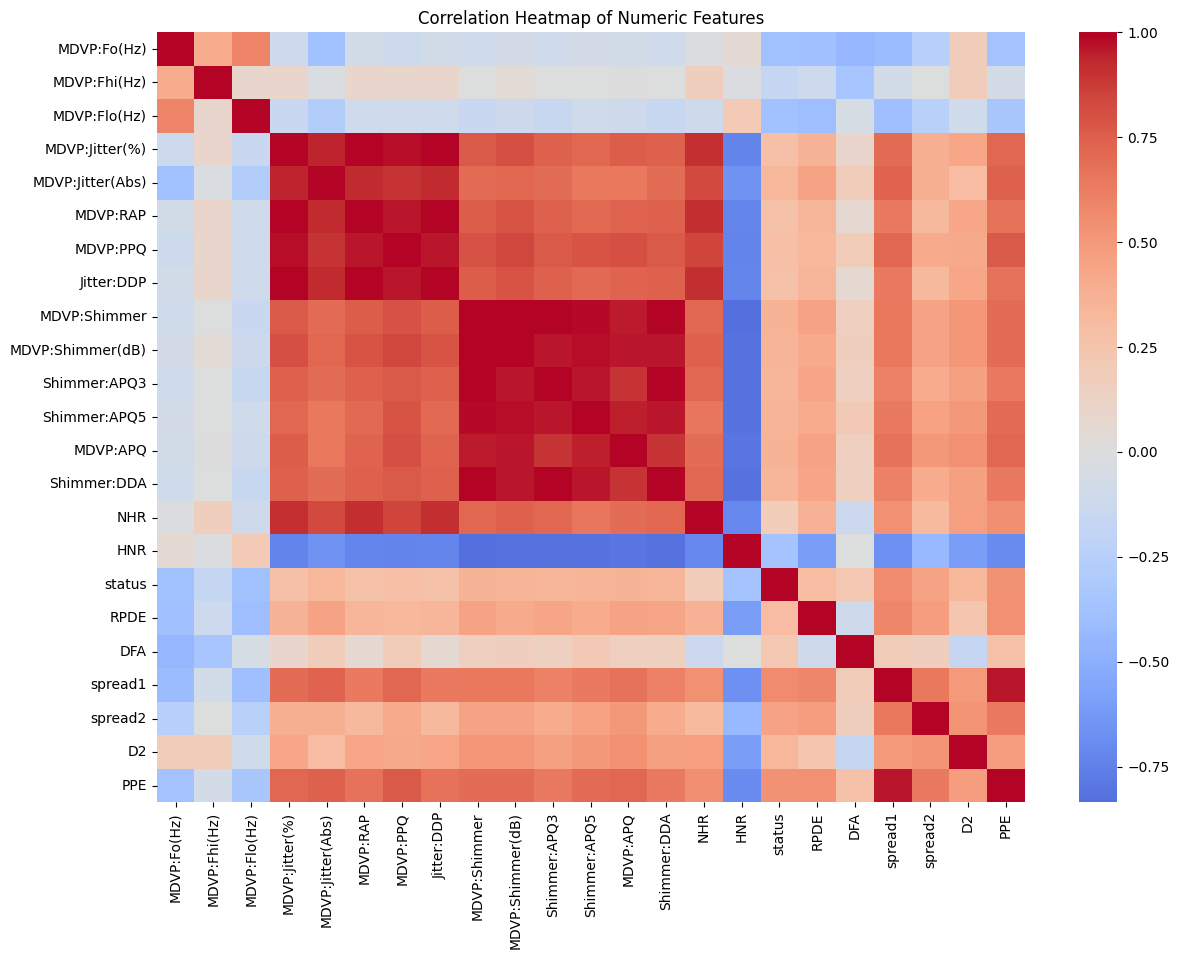

In [19]:

# 4. Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(data.drop(columns=["name"]).corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Many features are highly correlated (e.g., Jitter measures are correlated, Shimmer measures are correlated).

This can lead to multicollinearity → need feature selection or dimensionality reduction (PCA) before ML.

Some features like PPE, DFA show moderate correlation with status, making them good predictors.

In [86]:
# grouping the people based on target column
data.groupby('status').mean()

C:\Users\om\AppData\Local\Temp\ipykernel_17520\2671122414.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Data Preprocessing

In [87]:
#  Separating features and target

In [88]:
x = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

In [89]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [90]:
# split data to training and testing
# 80% for training and 20% for testing

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [92]:
print(x.shape, x_train.shape, x_test.shape)

(195, 22) (156, 22) (39, 22)


In [93]:
# out off 195 rows 156 goes to train i.e 80% and 39 goes for test i.e 20%

# Data standardization

In [94]:
# i.e convert all data between same range

In [95]:
scaler = StandardScaler()

In [96]:
scaler.fit(x_train)

StandardScaler()

In [97]:
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

# Model training


# support vector machine

In [98]:
model = svm.SVC(kernel = 'linear')

In [99]:
# training the SVM model with training data
model.fit(x_train, y_train)

SVC(kernel='linear')

# model evaluation

# Accuracy score

In [100]:
# accuracy score on train data
x_train_prediction = model.predict(x_train)
train_data_acc = accuracy_score(y_train, x_train_prediction)

In [101]:
print("Accuracy score of training data : ", train_data_acc)

Accuracy score of training data :  0.8846153846153846


In [102]:
# accuracy score on test data
x_test_prediction = model.predict(x_test)
test_data_acc = accuracy_score(y_test, x_test_prediction)

In [103]:
print("Accuracy score of test data : ", test_data_acc)

Accuracy score of test data :  0.8717948717948718


In [104]:
# their is no huge difference between train data and test data hence model is best train
# if it has huge difference then it indicate overfitting but our model is train better
# if accuracy on train data is more then model is overfit
# but it is not in our model happen so our model is working good

# build a predictive system


In [105]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


C:\Users\om\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
